In [1]:
#data:kaggle competitions download -c google-quest-challenge
import os
os.listdir()

['project.ipynb', 'start-from-here-quest-complete-eda-fe.ipynb', 'ti.ipynb']

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def get_entropy(df, round_val=3):
    result = []
    for col in df.columns:
        data = df[col].value_counts(normalize=True)
        result.append(round(stats.entropy(data, base=2), round_val))
    return result
def get_summary(df, cols=None):
    summary = pd.DataFrame()
    vcs = pd.DataFrame()
    if cols == None:
        cols = df.columns.values
    summary['Name'] = cols
    summary['dtype'] = df[cols].dtypes.values
    summary['Unique'] = df[cols].nunique().values
    summary['Missing'] = df[cols].isnull().sum().values
    summary['Mode'] = df[cols].mode().iloc[0].values
    summary['Mode Freq'] = df[cols].apply(lambda ser:pd.value_counts(ser, normalize=True).values[0]).values
    summary['Entropy'] = get_entropy(df[cols])
    return summary

In [ ]:
train_set = pd.read_csv('Data/train.csv')
test_set =  pd.read_csv('Data/test.csv')
submmistion=pd.read_csv('Data/sample_submission.csv')

In [4]:
train_set = pd.read_csv('../Data/train.csv')
test_set =  pd.read_csv('../Data/test.csv')
submmistion=pd.read_csv('../Data/sample_submission.csv')

In [5]:
data_cols = train_set.columns[:11]
que_tgt_cols = train_set.columns[11:32]
ans_tgt_cols = train_set.columns[32:]
target_cols = train_set.columns[11:]

In [6]:
print(data_cols)
print(que_tgt_cols)
print(ans_tgt_cols)

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host'],
      dtype='object')
Index(['question_asker_intent_understanding', 'question_body_critical',
       'question_conversational', 'question_expect_short_answer',
       'question_fact_seeking', 'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written'],
      dtype='object')
Index(['answer_helpful', 'answer_level_of_information', 'answer_plausibl

In [7]:
summary_data = get_summary(train_set[data_cols])
summary_data

,Name,dtype,Unique,Missing,Mode,Mode Freq,Entropy
0,qa_id,int64,6079,0,0,0.000165,12.570
1,question_title,object,3583,0,What is the best introductory Bayesian statist...,0.001974,11.641
2,question_body,object,3583,0,Which is the best introductory textbook for Ba...,0.001974,11.641
3,question_user_name,object,3215,0,Mike,0.002468,11.420
4,question_user_page,object,3422,0,https://stats.stackexchange.com/users/5,0.001974,11.557
5,answer,object,6079,0,\n\nPrint it and give it to your teacher. Or s...,0.000165,12.570
6,answer_user_name,object,4114,0,Scott,0.003290,11.678
7,answer_user_page,object,4430,0,https://tex.stackexchange.com/users/4427,0.002797,11.846
8,url,object,3583,0,http://stats.stackexchange.com/questions/125/w...,0.001974,11.641
9,category,object,5,0,TECHNOLOGY,0.401546,2.144


In [8]:
train_set['host'] = train_set['host'].apply(lambda s: s if s.find('stackexchange.com') == -1 else 'stackexchange.com')
test_set['host'] = test_set['host'].apply(lambda s: s if s.find('stackexchange.com') == -1 else 'stackexchange.com')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # Remove the CWD from sys.path while we load stuff.


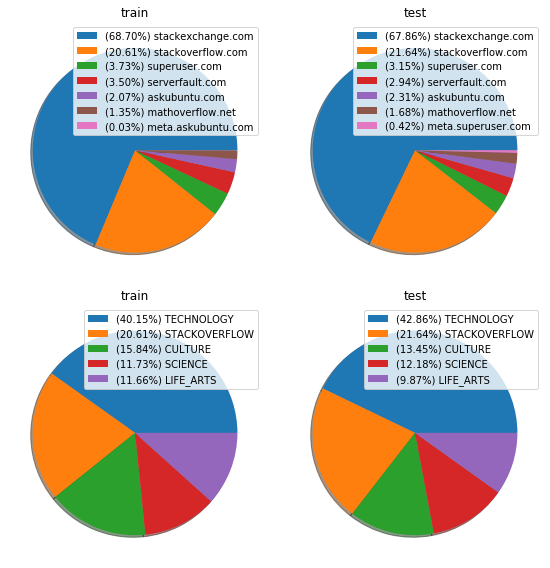

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [10]:
fig, axes = plt.subplots(2,2, figsize=(8,8))
axes = axes.ravel()

def draw_pie(df,col, pos, legend_loc, title):
    ax = axes[pos]
    temp = df[col].value_counts(normalize=True)
    patches = ax.pie(temp.values, shadow=True)
    ax.set_title(title)
    labels = [str.format('({:.2%}) {}',temp.values[i],temp.index[i]) for i in range(len(temp))]
    ax.legend(patches, labels=labels, loc=legend_loc)

draw_pie(train_set, 'host', 0, 'best', 'train')
draw_pie(test_set , 'host', 1, 'best', 'test')
draw_pie(train_set, 'category', 2, 'best','train')
draw_pie(test_set , 'category', 3, 'best','test')
plt.tight_layout()
plt.show()
plt.close()
#fig.savefig('hosts_categories.eps')
#fig.savefig('hosts_categories.pdf')

In [11]:
summary_target = get_summary(train_set[target_cols])
s_summary_target = summary_target.sort_values('Unique',ascending=False)
s_summary_target

,Name,dtype,Unique,Missing,Mode,Mode Freq,Entropy
25,answer_satisfaction,float64,17,0,1.000000,0.207600,2.998
0,question_asker_intent_understanding,float64,9,0,1.000000,0.466031,2.020
1,question_body_critical,float64,9,0,0.333333,0.247738,2.839
24,answer_relevance,float64,9,0,1.000000,0.808192,1.027
23,answer_plausible,float64,9,0,1.000000,0.774798,1.182
22,answer_level_of_information,float64,9,0,0.666667,0.676756,1.782
21,answer_helpful,float64,9,0,1.000000,0.608817,1.719
20,question_well_written,float64,9,0,1.000000,0.266327,2.659
29,answer_well_written,float64,9,0,1.000000,0.433295,1.867
7,question_interestingness_self,float64,9,0,0.333333,0.349400,2.559


In [12]:
summary_target

,Name,dtype,Unique,Missing,Mode,Mode Freq,Entropy
0,question_asker_intent_understanding,float64,9,0,1.000000,0.466031,2.020
1,question_body_critical,float64,9,0,0.333333,0.247738,2.839
2,question_conversational,float64,5,0,0.000000,0.889785,0.673
3,question_expect_short_answer,float64,5,0,1.000000,0.482974,1.958
4,question_fact_seeking,float64,5,0,1.000000,0.572463,1.647
5,question_has_commonly_accepted_answer,float64,5,0,1.000000,0.669683,1.524
6,question_interestingness_others,float64,9,0,0.666667,0.301201,2.462
7,question_interestingness_self,float64,9,0,0.333333,0.349400,2.559
8,question_multi_intent,float64,5,0,0.000000,0.594999,1.666
9,question_not_really_a_question,float64,5,0,0.000000,0.989143,0.100


目标们最多有17个值，最少只有3个。画画分布图看看：

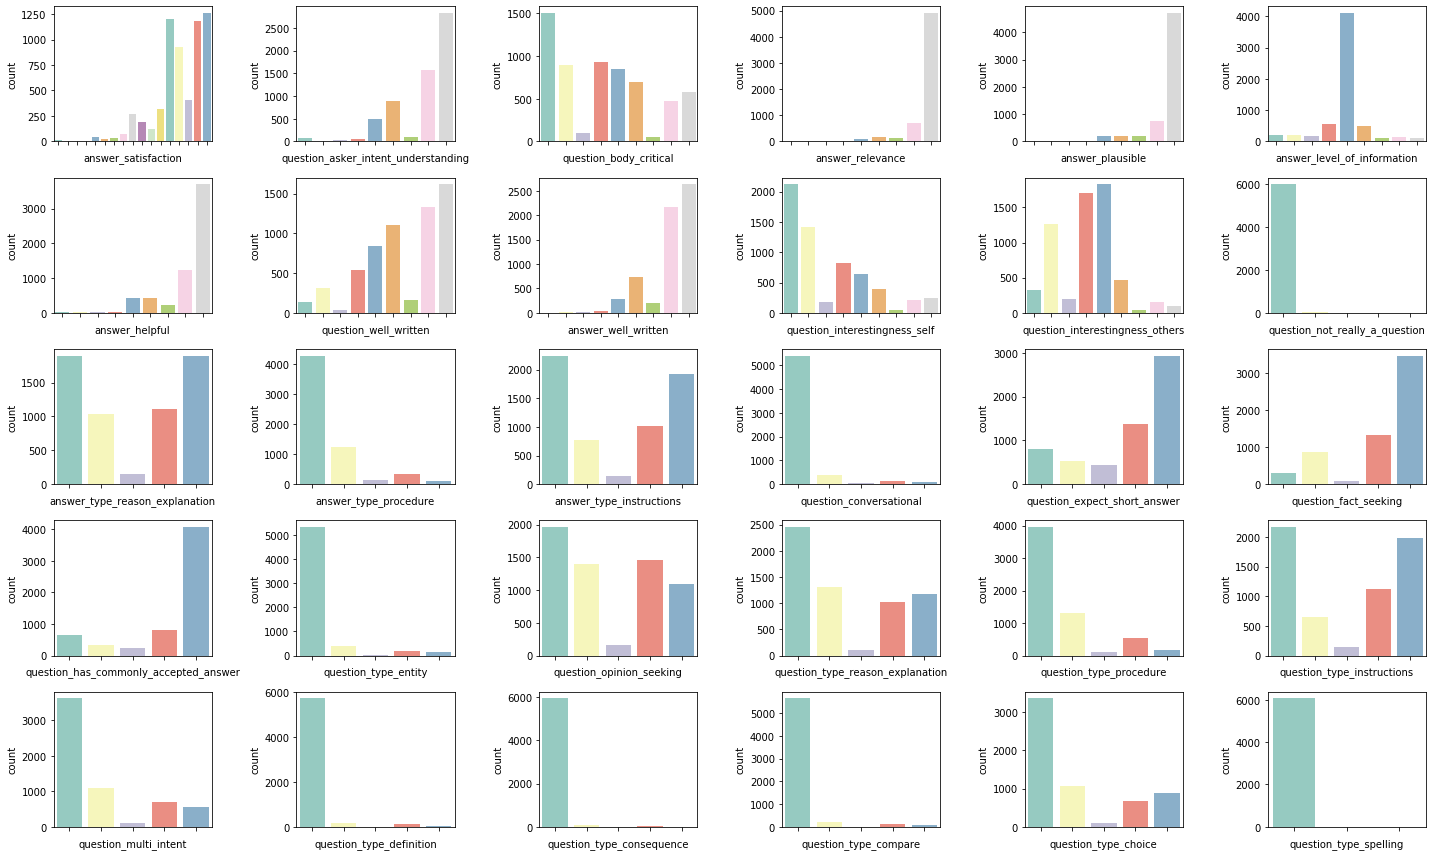

In [13]:
fig, axes = plt.subplots(5,6, figsize=(20, 12))
axes = axes.ravel()
sorted_index = s_summary_target.index
for i in range(len(target_cols)):
    col = target_cols[sorted_index[i]]
    ax = axes[i]
    #print(str.format('({},{},{})',i,col,len(bins)))
    sns.countplot(x=col, data=train_set,palette="Set3", ax=ax)
    ax.set_xticklabels([])
    #ax.tick_params(axis='x', rotation=30)
    # ax.set_title(col)
    #ax.set_xlim([0, 1])
    #ax.set_ylim([0, 6079])
plt.tight_layout()
plt.show()
plt.close()
fig.savefig('targets.eps')
fig.savefig('targets.pdf')

In [200]:
duplicated_q = train_set['question_title'].value_counts()
duplicated_q = duplicated_q[duplicated_q > 2]

In [71]:
def set_all_to_mode(df):
    if len(df) < 3:
        return df
    mode = df.mode().iloc[0]
    return df.assign(**mode)
train_set[que_tgt_cols] = train_set.groupby('question_title', sort = False)[que_tgt_cols].apply(set_all_to_mode)

In [60]:
test = train_set[que_tgt_cols].copy()
ser = test.mode().iloc[0]

In [54]:
%%time
for i in range(100):
    test.assign(**ser)

Wall time: 335 ms


In [56]:
%%time
for i in range(100):
    test.div(test).mul(ser)

Wall time: 817 ms


In [59]:
pd.DataFrame(np.tile(ser, (len(test), 1)), columns=test.columns)

,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,...,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written
0,1.0,0.333333,0.0,1.0,1.0,1.0,0.666667,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.333333,0.0,1.0,1.0,1.0,0.666667,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.333333,0.0,1.0,1.0,1.0,0.666667,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.333333,0.0,1.0,1.0,1.0,0.666667,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.333333,0.0,1.0,1.0,1.0,0.666667,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6074,1.0,0.333333,0.0,1.0,1.0,1.0,0.666667,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6075,1.0,0.333333,0.0,1.0,1.0,1.0,0.666667,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6076,1.0,0.333333,0.0,1.0,1.0,1.0,0.666667,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6077,1.0,0.333333,0.0,1.0,1.0,1.0,0.666667,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


到这里就完成了所有nlp处理前的feature engineering。

## Word Tokenlization(Tensorflow USE)

In [72]:
import tensorflow_hub as hub
EPOCHS = 12
BATCH_SIZE = 32
LEARNING_RATE = 3e-4
EMBEDDDING_SIZE = 512
N_CLASS = len(target_cols)
ES_PATIENCE = 3
RLROP_PATIENCE = 2
DECAY_DROP = 0.3

In [ ]:
module_url = "../input/universalsentenceencodermodels/universal-sentence-encoder-models/use-qa"
use_embed = hub.load(module_url)

Model

In [ ]:
from keras.models import Model
from keras.layers import Dense, Input, Dropout, Lambda
from keras.optimizers import Adam
from keras.callbacks import Callback
from scipy.stats import spearmanr, rankdata

In [ ]:
def USEEmbedding(x):
    return use_embed(tf.squeeze(tf.cast(x, tf.string)))

def model_fn():
    input_title = Input(shape=(1,), dtype=tf.string, name='input_title')
    embedding_title = Lambda(USEEmbedding, output_shape=(EMBEDDDING_SIZE,))(input_title)

    input_body = Input(shape=(1,), dtype=tf.string, name='input_body')
    embedding_body = Lambda(USEEmbedding, output_shape=(EMBEDDDING_SIZE,))(input_body)

    input_answer = Input(shape=(1,), dtype=tf.string, name='input_answer')
    embedding_answer = Lambda(USEEmbedding, output_shape=(EMBEDDDING_SIZE,))(input_answer)

    x = Concatenate()([embedding_title, embedding_body, embedding_answer])
    x = Dropout(0.5)(x)
    x = Dense(512, activation='elu')(x)
    x = Dropout(0.5)(x)
    output = Dense(N_CLASS, activation='sigmoid', name='output')(x)
    model = Model(inputs=[input_title, input_body, input_answer], outputs=[output])

    optimizer = optimizers.Adam(LEARNING_RATE)
    model.compile(optimizer=optimizer, loss='binary_crossentropy')
    
    return model